# Lab 1-1

theta = [[32. ]
 [ 1.8]]
MSE train:0.000


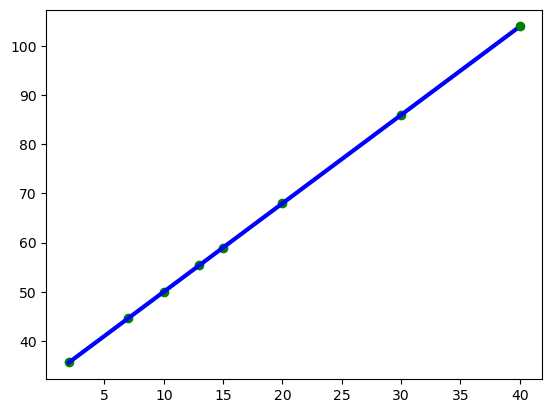

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error 
# data
x = np.array( [2,7,10,13,15,20,30,40] ) 
y = np.array( [ [35.6], [44.6], [50.0], [55.4], [59.0],[68.0], [86.0], [104.0]]) 
yi= np.ones((len(y),1)) 
#formula
n=2
Phi = np.array( [x**i for i in range(n)] ).T
theta = np.dot( np.dot( np.linalg.inv( np.dot( Phi.T, Phi ) ), Phi.T ), y ) # theta= (Phi.T*Phi)-1次方 *Phi.T*y
print('theta =',theta ) 
#print(Phi)
#print(Phi.T)
#print(np.dot( Phi.T, Phi ))
#print(np.linalg.inv( np.dot( Phi.T, Phi )  ))
#print(y)
#LOSS assessment
xx = np.arange( x.min(), x.max(), ( x.max() - x.min() ) / 100.0 ) 
#print(xx)
P = np.array( [xx**i for i in range(n) ] ) 
for a in range(len(y)): 
 ya=(theta[1]*x[a]+theta[0]) 
 yi[a]=ya 
print('MSE train:%.3f'%(mean_squared_error(y,yi))) 
#print(np.dot( P.T, theta ))
#draw
plt.scatter( x , y, color='green' ) 
plt.plot( xx, np.dot( P.T, theta ), color='blue', linewidth='3.0' ) 
plt.show()


# Lab 1-2

# Import Database

In [4]:
import random
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout
from keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Data Processing

In [5]:
random.seed(0)
degreeCs = [[float(f'{random.randint(-100, 150)}.{random.randint(0,10)}')] for _ in range(1000)]
degreeFs = [[round((i[0]*1.8)+32,2)] for i in degreeCs]
#print(degreeCs)
#print(degreeFs)
min_max_scaler_X = MinMaxScaler()
min_max_scaler_Y = MinMaxScaler()
X_scale = min_max_scaler_X.fit_transform(degreeCs)
Y_scale = min_max_scaler_Y.fit_transform(degreeFs)

X_train, X_test, y_train, y_test = train_test_split(X_scale, Y_scale, test_size=0.2, random_state=0)
#print(X_scale)
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)
print(X_test.shape)


(800, 1)
(800, 1)
(200, 1)
(200, 1)


# Modeling

In [6]:
model = Sequential()

model.add(Dense(256, input_dim=1, activation='relu'))# Hidden layer
model.add(Dense(100, input_dim=1, activation='relu'))# Hidden layer
model.add(Dense(50, input_dim=1, activation='relu'))# Hidden layer
model.add(Dense(10, input_dim=1, activation='relu'))# Hidden layer
model.add(Dense(1, activation='sigmoid'))# Output layer

print(model.summary())
model.compile(loss='MeanAbsoluteError', optimizer="adam", metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100, batch_size = 256, verbose =2)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               512       
                                                                 
 dense_1 (Dense)             (None, 100)               25700     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31,783
Trainable params: 31,783
Non-trainable params: 0
_________________________________________________________________
None


2023-12-31 00:23:55.200192: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing 

Epoch 52/100
4/4 - 0s - loss: 0.0220 - accuracy: 0.0025 - val_loss: 0.0206 - val_accuracy: 0.0000e+00 - 94ms/epoch - 24ms/step
Epoch 53/100
4/4 - 0s - loss: 0.0211 - accuracy: 0.0025 - val_loss: 0.0203 - val_accuracy: 0.0000e+00 - 67ms/epoch - 17ms/step
Epoch 54/100
4/4 - 0s - loss: 0.0210 - accuracy: 0.0025 - val_loss: 0.0203 - val_accuracy: 0.0000e+00 - 70ms/epoch - 17ms/step
Epoch 55/100
4/4 - 0s - loss: 0.0209 - accuracy: 0.0025 - val_loss: 0.0225 - val_accuracy: 0.0000e+00 - 81ms/epoch - 20ms/step
Epoch 56/100
4/4 - 0s - loss: 0.0221 - accuracy: 0.0025 - val_loss: 0.0201 - val_accuracy: 0.0000e+00 - 115ms/epoch - 29ms/step
Epoch 57/100
4/4 - 0s - loss: 0.0219 - accuracy: 0.0025 - val_loss: 0.0229 - val_accuracy: 0.0000e+00 - 104ms/epoch - 26ms/step
Epoch 58/100
4/4 - 0s - loss: 0.0235 - accuracy: 0.0025 - val_loss: 0.0211 - val_accuracy: 0.0000e+00 - 58ms/epoch - 14ms/step
Epoch 59/100
4/4 - 0s - loss: 0.0221 - accuracy: 0.0025 - val_loss: 0.0240 - val_accuracy: 0.0000e+00 - 55ms/

# Testing

In [7]:
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print('MSE: %.3f' % (mse))
y_test_pred = min_max_scaler_Y.inverse_transform(y_test_pred)
X_test = min_max_scaler_X.inverse_transform(X_test).tolist()
y_test_pred = y_test_pred.tolist()
result = [[X_test[i][0], y_test_pred[i][0]] for i in range(len(X_test))]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
7/7 [==============================] - 0s 2ms/step
MSE: 0.001


# Prediction

In [8]:
data1= np.array(np.random.randint(0, 150,6))
print(data1)
n_testData = min_max_scaler_X.transform(data1.reshape(len(data1), 1))
pre = model.predict(n_testData)
pre = np.array([[i] for i in pre])
pre = pre.reshape(len(pre), 1)
preList = min_max_scaler_Y.inverse_transform(pre)
print(preList)

[111 110  50 121  63  25]
1/1 [==============================] - 0s 28ms/step
[[234.26233 ]
 [232.7249  ]
 [122.978615]
 [248.16118 ]
 [147.05562 ]
 [ 74.00773 ]]


In [9]:
data2= np.array(np.random.randint(0, 150,6))
print(data2)
n_testData = min_max_scaler_X.transform(data2.reshape(len(data2), 1))
pre = model.predict(n_testData)
pre = np.array([[i] for i in pre])
pre = pre.reshape(len(pre), 1)
preList = min_max_scaler_Y.inverse_transform(pre)
print(preList)

[ 47 100 140  86  21 127]
1/1 [==============================] - 0s 27ms/step
[[117.24036]
 [215.78967]
 [267.99832]
 [187.2029 ]
 [ 66.07762]
 [255.28981]]


In [10]:
data3= np.array(np.random.randint(0, 150,6))
print(data1)
n_testData = min_max_scaler_X.transform(data3.reshape(len(data3), 1))
pre = model.predict(n_testData)
pre = np.array([[i] for i in pre])
pre = pre.reshape(len(pre), 1)
preList = min_max_scaler_Y.inverse_transform(pre)
print(preList)

[111 110  50 121  63  25]
1/1 [==============================] - 0s 23ms/step
[[101.69515]
 [ 87.89199]
 [ 72.02375]
 [150.62532]
 [244.26561]
 [274.19824]]


In [11]:
data = np.array([10,20,30,40,50,60,70])
print(data)
n_testData = min_max_scaler_X.transform(data.reshape(len(data), 1))
pre = model.predict(n_testData)
pre = np.array([[i] for i in pre])
pre = pre.reshape(len(pre), 1)
preList = min_max_scaler_Y.inverse_transform(pre)
print(preList)


[10 20 30 40 50 60 70]
1/1 [==============================] - 0s 23ms/step
[[ 44.46657 ]
 [ 64.09848 ]
 [ 83.92878 ]
 [103.65445 ]
 [122.978615]
 [141.62842 ]
 [159.36934 ]]
